# DATA CLEANING
1. delete features with missing value over 41%
2. filter patients who enter at stage go and those who enter at stage 1 and stay
3. delete features that are not related with alzheimer's, e.g. software version or clearly redundant with existing columns
4. impute DX label and delete patients
5. convert numerical attribute data type
6. impute numerical attributes
7. OHE encode categorical features

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", 200) 
pd.set_option("display.max_columns", 200) 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Applied Analytics ML Pipeline/Datasets/

/content/drive/MyDrive/Applied Analytics ML Pipeline/Datasets


In [ ]:
df = pd.read_csv('filtered_adnimerge.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Calculating the amount of missing datapoints within the features as a percentage of the features. 

def missing_pct_calculation(df_merge):
  '''
  calculate missing percantage for each variable
  '''
  pct_missing = []
  for col in df_merge.columns:
      pct_missing.append((col,np.mean(df_merge[col].isnull())))
  pct_missing = sorted(pct_missing,key = lambda x:x[1])
  col_name = np.array([i[0] for i in pct_missing])
  col_pct =  np.array([i[1] for i in pct_missing])
  print('{} of all features with missing value pct higher or equal to 0.4.'.format(sum(col_pct >= 0.4)))

  return col_name, col_pct
  
  
def bar_missing_value(col_name, col_pct):
  '''
  visualize the percentage as bar grapg
  '''

  plt.figure(num=None, figsize=(60, 12), dpi=80, facecolor='w', edgecolor='k')
  plt.bar(col_name,col_pct)
  plt.xticks(rotation=90)
  plt.title('Pct of Missing value for all features')
  plt.axhline(y=0.41, color='r', linestyle='--')
  plt.show()




## percentage of missing value for all variables in the merged data


19 of all features with missing value pct higher or equal to 0.4.


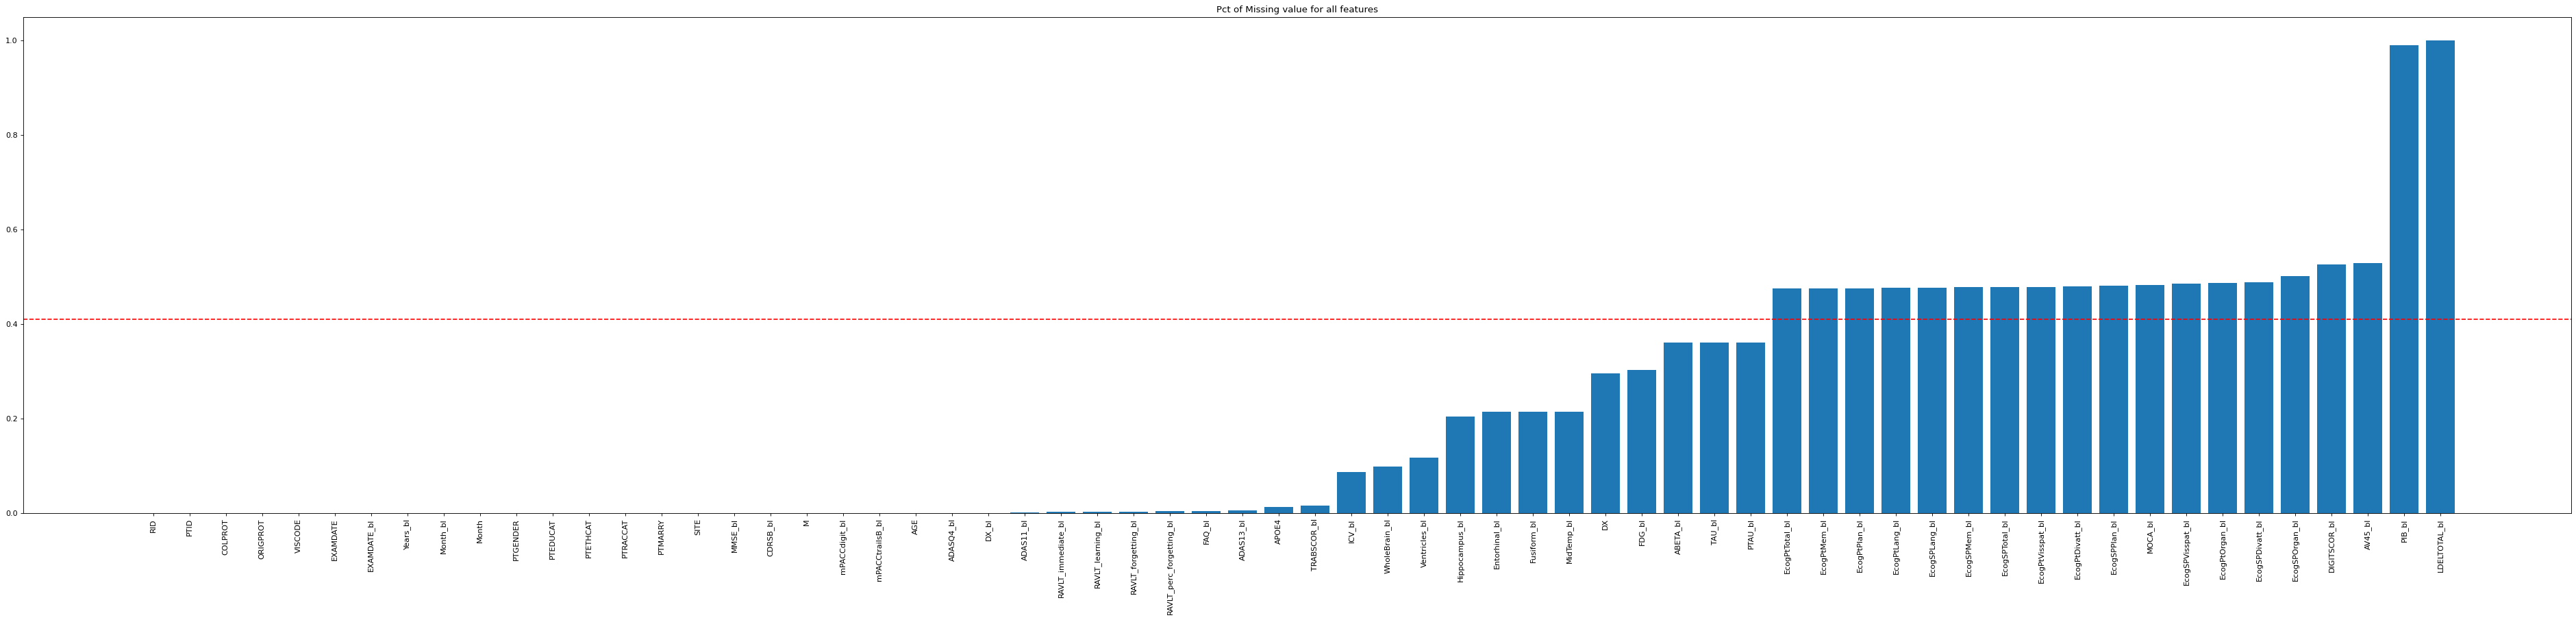

In [ ]:
# for all
col_name, col_pct = missing_pct_calculation(df)
bar_missing_value(col_name, col_pct)

3 of all features with missing value pct higher or equal to 0.4.


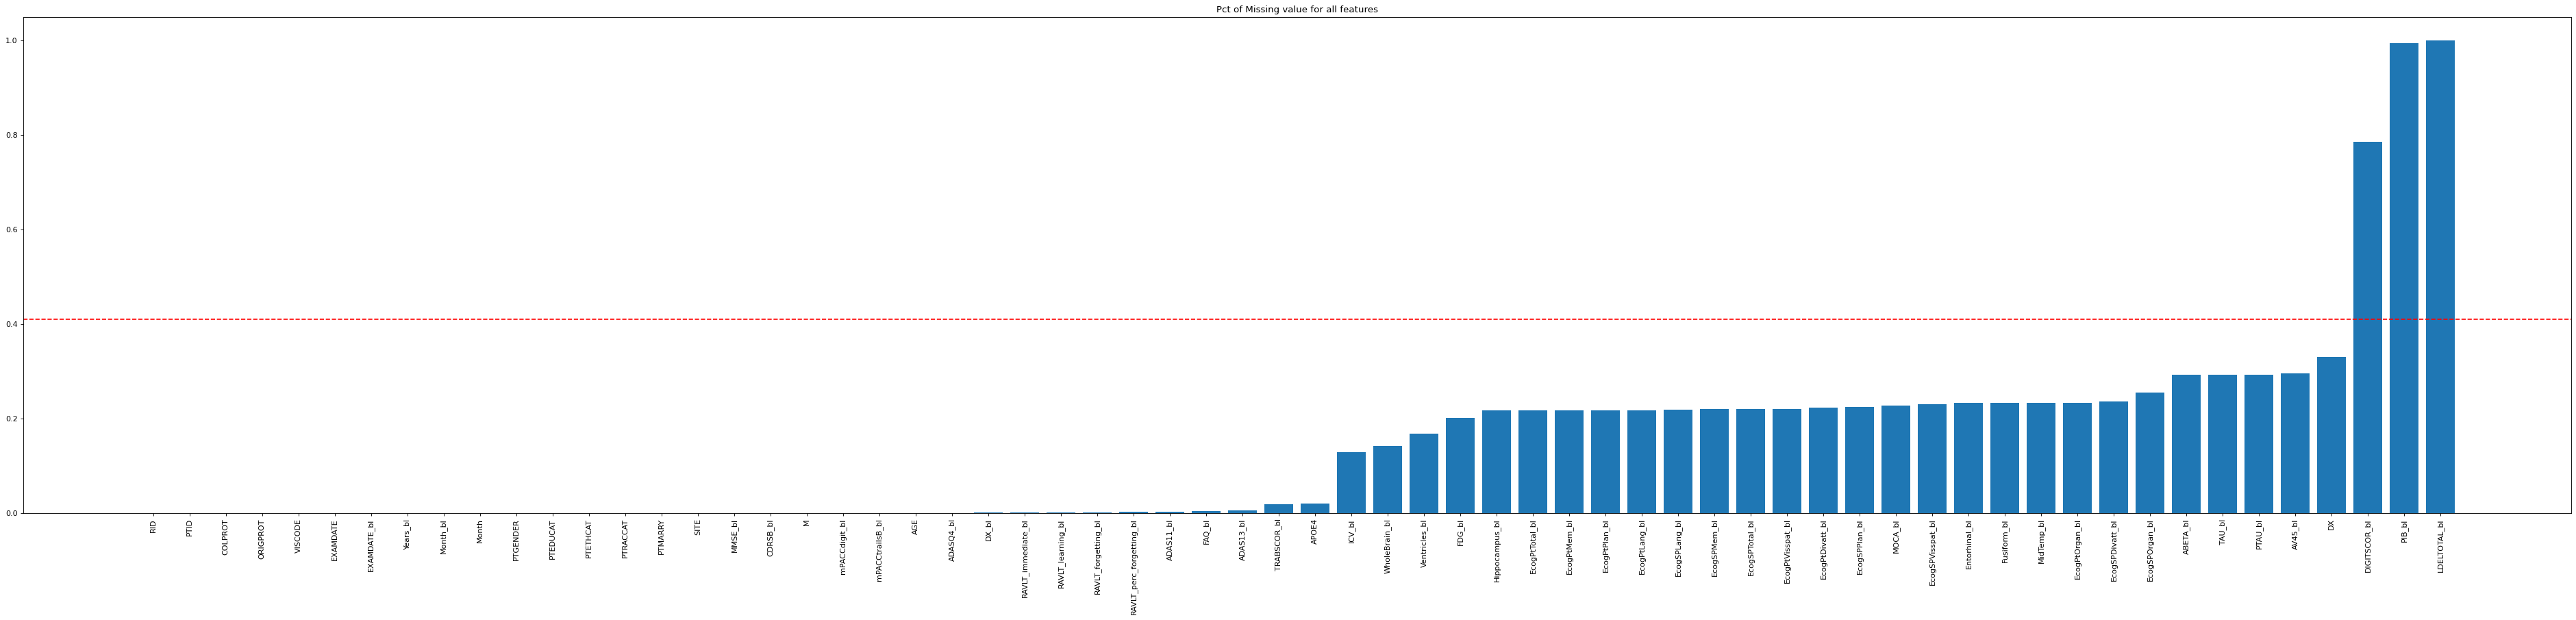

In [ ]:
#from adnigo
adni_fromgo = df[(df.COLPROT != 'ADNI1')]
col_name, col_pct = missing_pct_calculation(adni_fromgo)
bar_missing_value(col_name, col_pct)

3 of all features with missing value pct higher or equal to 0.4.


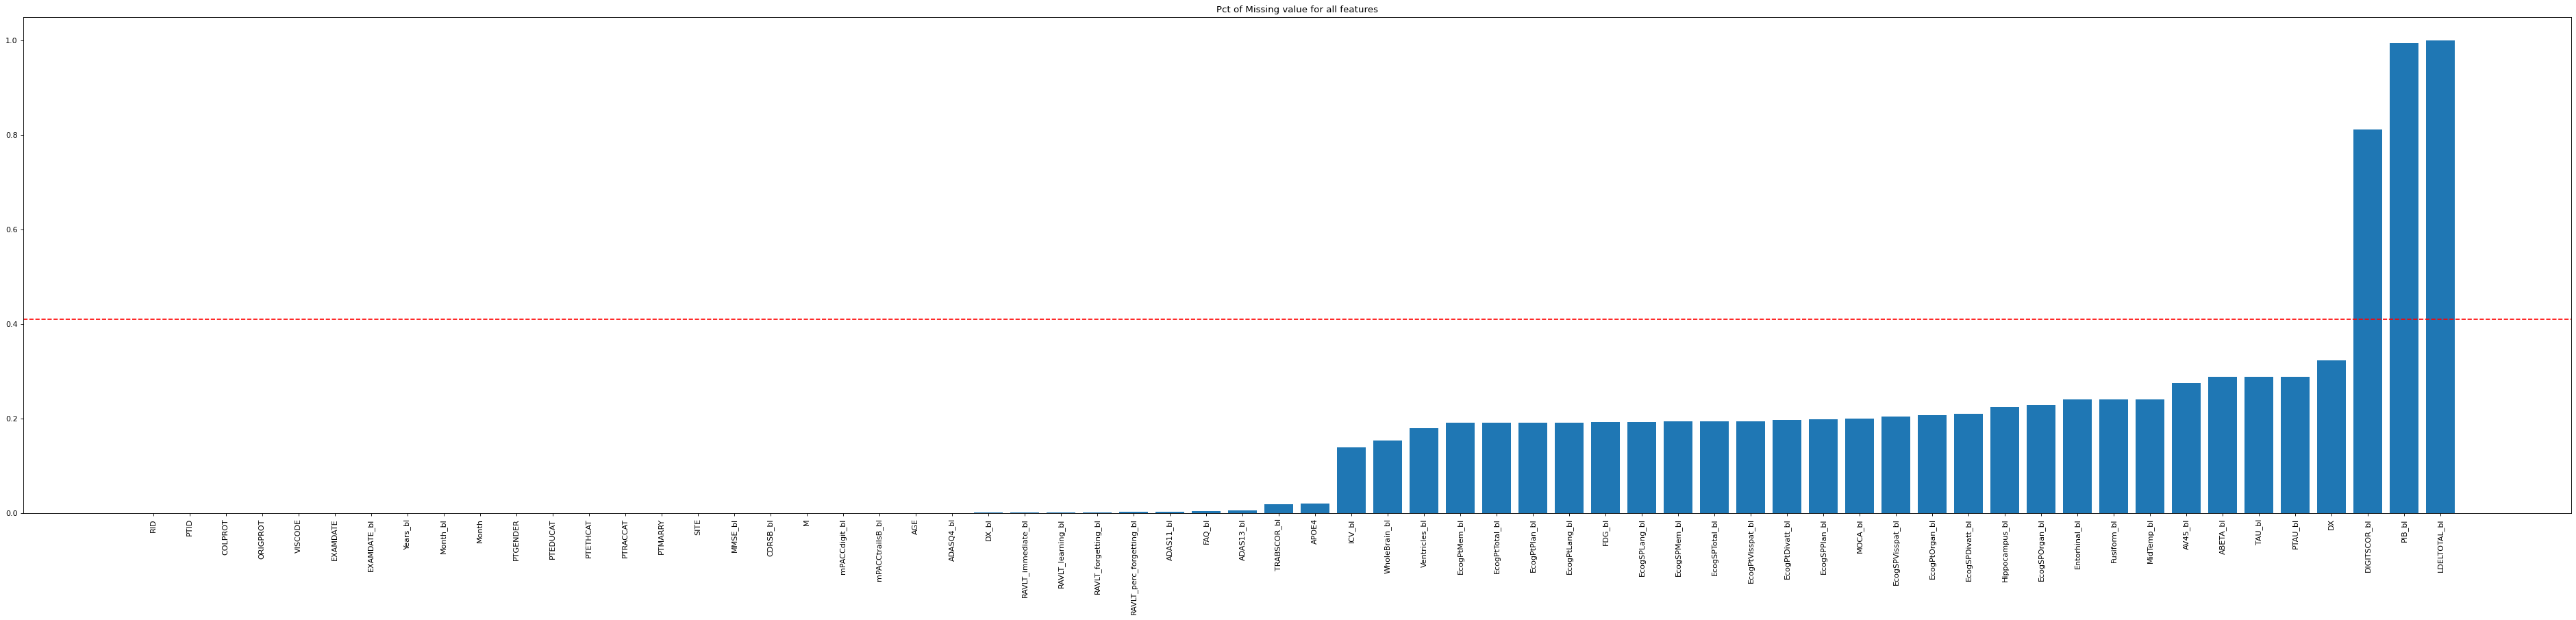

In [ ]:
#from adni2
adni_from2 = df[(df.COLPROT == 'ADNI2') | (df.COLPROT == 'ADNI3')]
col_name, col_pct = missing_pct_calculation(adni_from2)
bar_missing_value(col_name, col_pct)

15 of all features with missing value pct higher or equal to 0.4.


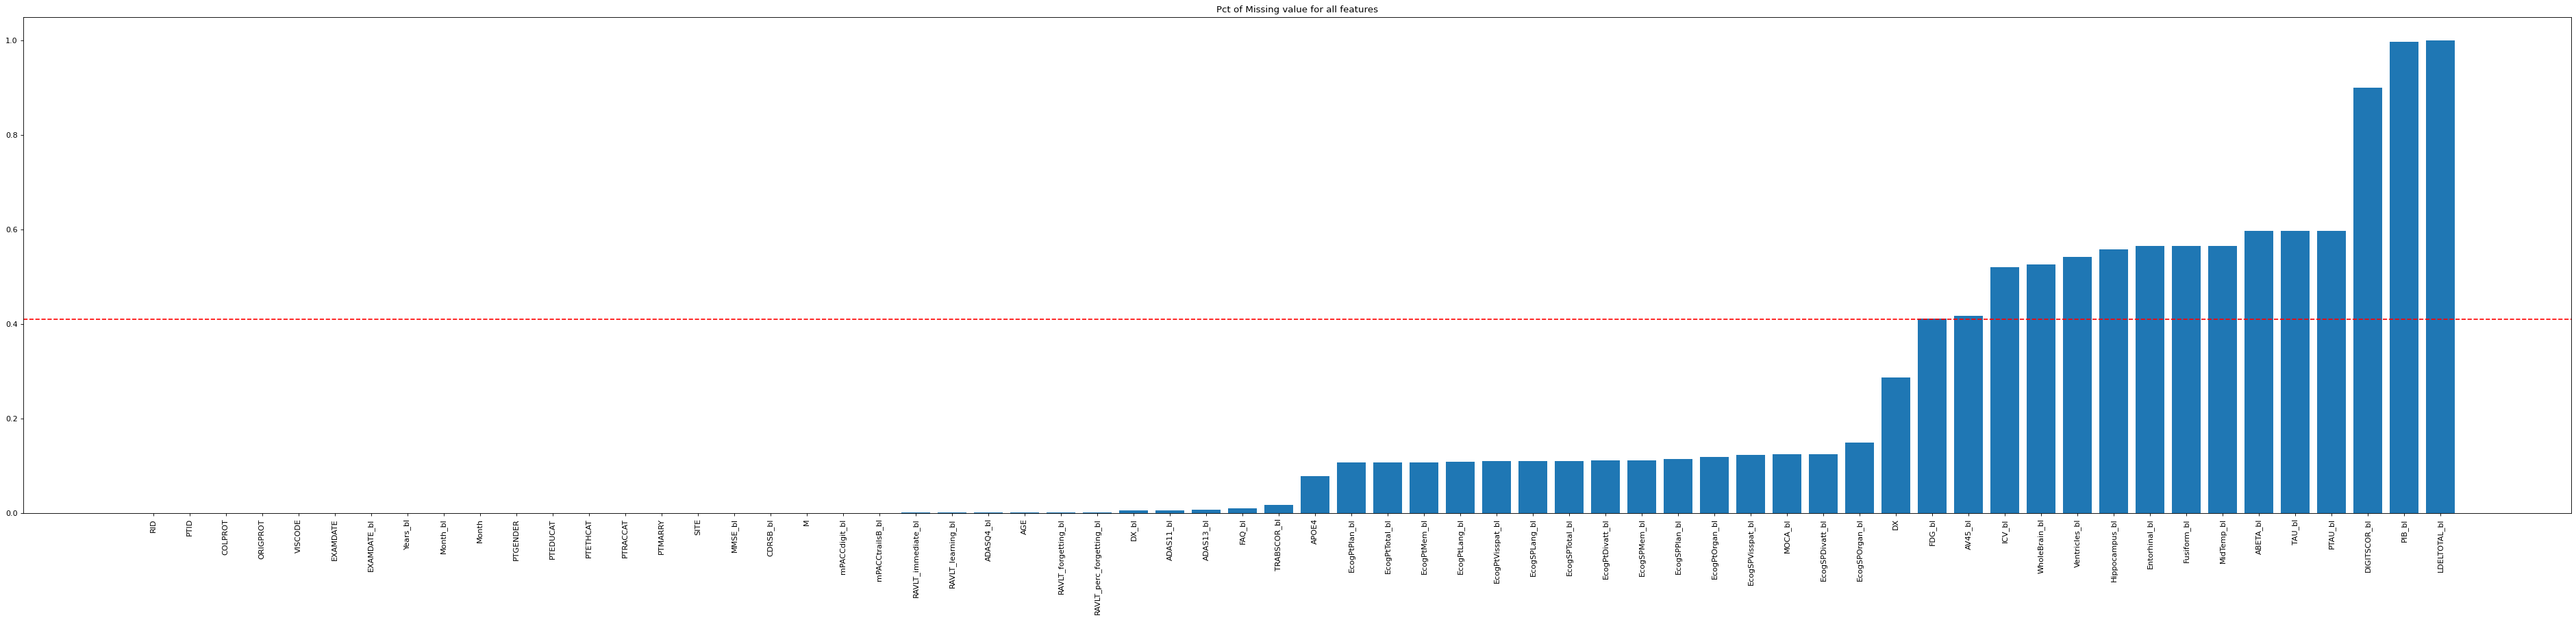

In [ ]:
# from adni3
adni_3 = df[df.COLPROT == 'ADNI3']
col_name, col_pct = missing_pct_calculation(adni_3)
bar_missing_value(col_name, col_pct)

## patients in each ADNI stage

In [ ]:
#total # of patients
df['RID'].nunique()

2294

In [ ]:
# # of patients by adni stage
df.groupby('COLPROT')['RID'].nunique()

COLPROT
ADNI1      819
ADNI2     1186
ADNI3      996
ADNIGO     341
Name: RID, dtype: int64

In [ ]:
adni_fromgo['RID'].nunique()

1778

In [ ]:
adni_from2['RID'].nunique()

1740

In [ ]:
adni1 = df[(df.COLPROT == 'ADNI1')]
adni1['RID'].nunique()

819

In [ ]:
#  intersection of two arrays 
  
def interSection(arr1,arr2): 
  
     # filter(lambda x: x in arr1, arr2)  --> 
     # filter element x from list arr2 where x 
     # also lies in arr1 
     result = list(filter(lambda x: x in arr1, arr2))
     print ("Intersection : ",len(result))
     return result

RID_1_2 = interSection(adni1['RID'].unique(),adni_fromgo['RID'].unique())

Intersection :  303


## Data filtration (adni group)

In [ ]:
df.shape

(15171, 64)

In [ ]:
# df_filtered = df[df['RID'].isin(RID_1_2) | (df.COLPROT != 'ADNI1')]
# print(df_filtered['RID'].nunique())
# col_name, col_pct = missing_pct_calculation(df_filtered)
# bar_missing_value(col_name, col_pct)

1475
21 of all features with missing value pct higher or equal to 0.4.


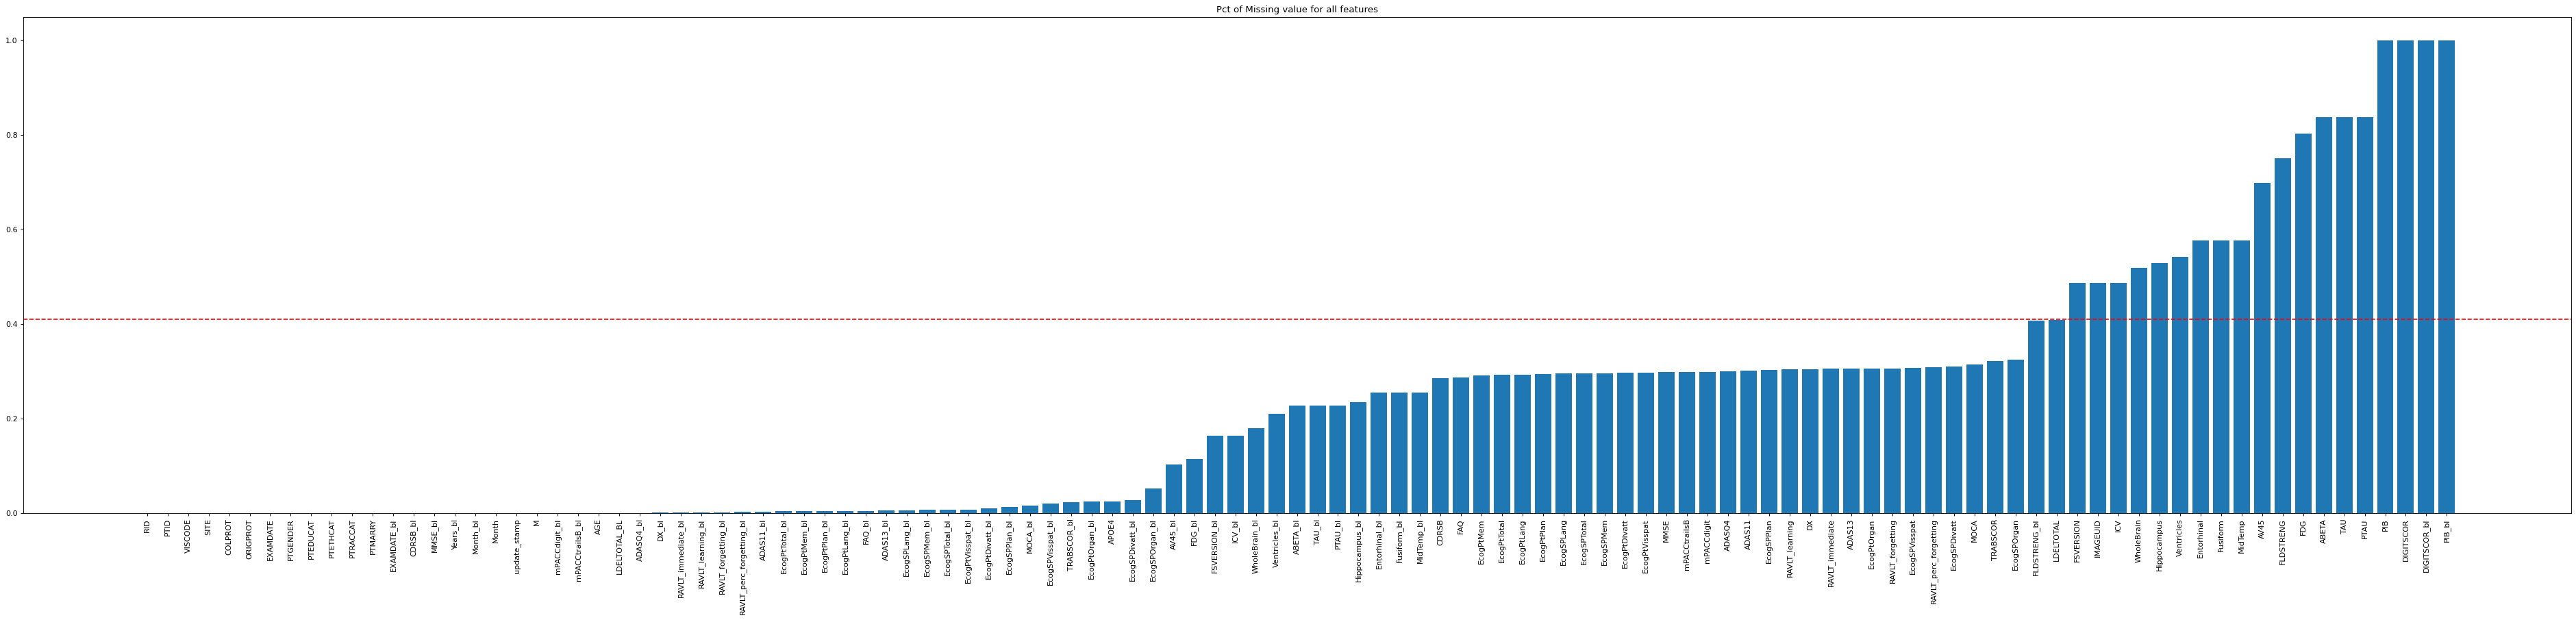

In [ ]:
### OLD

df_filtered = df[(~df['RID'].isin(RID_1_2)) & (df.COLPROT != 'ADNI1')]
print(df_filtered['RID'].nunique())
col_name, col_pct = missing_pct_calculation(df_filtered)
bar_missing_value(col_name, col_pct)

19 of all features with missing value pct higher or equal to 0.4.


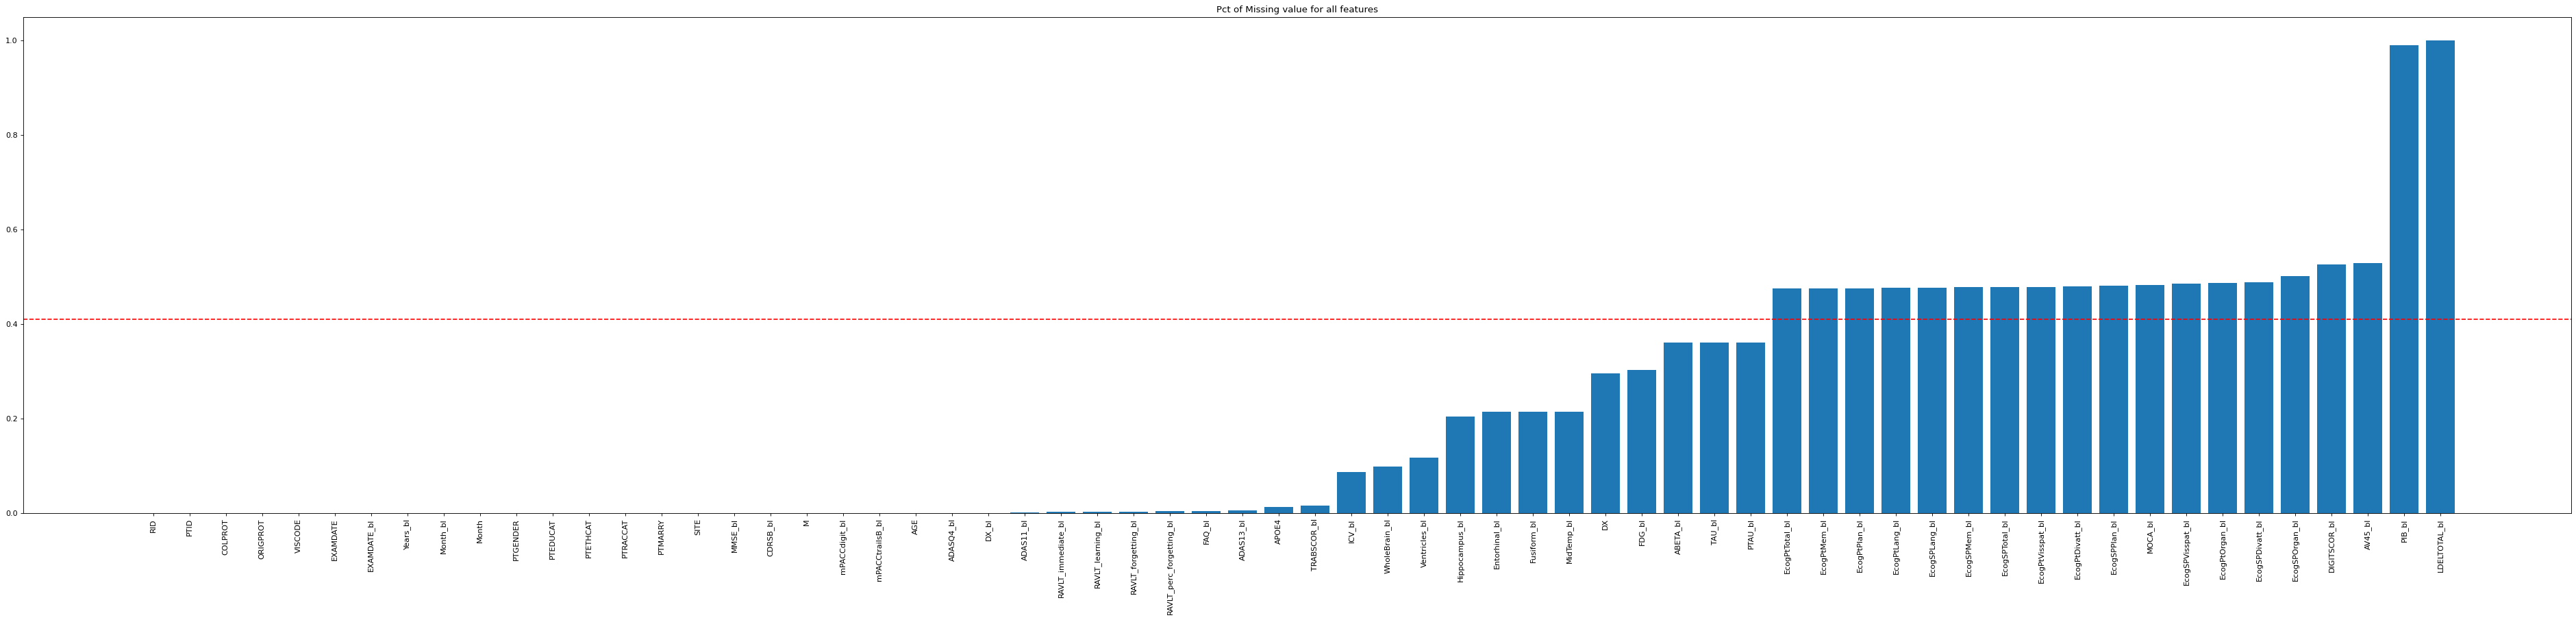

In [ ]:
#### new

col_name, col_pct = missing_pct_calculation(df)
bar_missing_value(col_name, col_pct)

In [ ]:
pd.DataFrame(col_name, col_pct)

,0
0.000000,RID
0.000000,PTID
0.000000,COLPROT
0.000000,ORIGPROT
0.000000,VISCODE
0.000000,EXAMDATE
0.000000,EXAMDATE_bl
0.000000,Years_bl
0.000000,Month_bl
0.000000,Month


## Feature deletion due to high missing

In [ ]:
#### newly changed from df_filtered to df

delete_columns = col_name[col_pct > 0.41]
df_cleaned = df.drop(columns = delete_columns)

In [ ]:
len(delete_columns)

19

In [ ]:
df.shape

(15171, 64)

In [ ]:
df_cleaned.shape

(15171, 45)

## Delete useless columns

In [ ]:
# 'update_stamp''FLDSTRENG_bl', 'FSVERSION_bl'
useless_cols = ['PTID', 'SITE','M' ]
df_cleaned = df_cleaned.drop(useless_cols, axis = 1)

In [ ]:
df_cleaned

,RID,COLPROT,ORIGPROT,VISCODE,EXAMDATE,EXAMDATE_bl,Years_bl,Month_bl,Month,DX,DX_bl,ABETA_bl,TAU_bl,PTAU_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,MMSE_bl,TRABSCOR_bl,mPACCdigit_bl,mPACCtrailsB_bl,FAQ_bl,CDRSB_bl,ADAS11_bl,ADAS13_bl,ADASQ4_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,FDG_bl
0,2,ADNI1,ADNI1,bl,2005-09-08,2005-09-08,0.000000,0.00000,0,CN,CN,NaN,NaN,NaN,74.3,Male,16,Not Hisp/Latino,White,Married,0.0,44.0,4.0,6.0,54.5455,28,112.0,-4.394370,-4.204620,0.0,0.0,10.67,18.67,5.0,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,1.36665
1,3,ADNI1,ADNI1,bl,2005-09-12,2005-09-12,0.000000,0.00000,0,Dementia,AD,741.5,239.7,22.83,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,22.0,1.0,4.0,100.0000,20,148.0,-16.557400,-16.145800,10.0,4.5,22.00,31.00,8.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,1.08355
2,3,ADNI1,ADNI1,m06,2006-03-13,2005-09-12,0.498289,5.96721,6,Dementia,AD,741.5,239.7,22.83,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,22.0,1.0,4.0,100.0000,20,148.0,-16.557400,-16.145800,10.0,4.5,22.00,31.00,8.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,1.08355
3,3,ADNI1,ADNI1,m12,2006-09-12,2005-09-12,0.999316,11.96720,12,Dementia,AD,741.5,239.7,22.83,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,22.0,1.0,4.0,100.0000,20,148.0,-16.557400,-16.145800,10.0,4.5,22.00,31.00,8.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,1.08355
4,3,ADNI1,ADNI1,m24,2007-09-12,2005-09-12,1.998630,23.93440,24,Dementia,AD,741.5,239.7,22.83,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,22.0,1.0,4.0,100.0000,20,148.0,-16.557400,-16.145800,10.0,4.5,22.00,31.00,8.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,1.08355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,6063,ADNI3,ADNI3,m36,2021-02-22,2018-02-20,3.006160,36.00000,36,NaN,SMC,NaN,NaN,NaN,74.0,Female,15,Not Hisp/Latino,Black,Never married,1.0,45.0,5.0,2.0,18.1818,30,104.0,3.496450,1.835940,0.0,0.0,8.00,11.00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15167,6899,ADNI3,ADNI3,bl,2021-02-24,2021-02-24,0.000000,0.00000,0,NaN,NaN,NaN,NaN,NaN,55.4,Female,12,Not Hisp/Latino,White,Never married,NaN,NaN,NaN,NaN,NaN,29,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15168,5278,ADNI3,ADNI2,m72,2020-03-05,2013-09-04,6.499660,77.83610,78,NaN,SMC,1336,347.8,31.48,80.2,Male,19,Not Hisp/Latino,White,Never married,1.0,36.0,8.0,7.0,63.6364,29,111.0,-3.120390,-3.280810,0.0,0.0,3.00,10.00,5.0,30975.0,7480.0,1022610.0,4313.0,19821.0,17272.0,1461910.0,1.22315
15169,6157,ADNI3,ADNI3,m36,2021-03-01,2018-02-21,3.022590,36.19670,36,NaN,CN,NaN,NaN,NaN,67.8,Female,12,Not Hisp/Latino,White,Married,1.0,61.0,9.0,3.0,20.0000,29,55.0,0.225568,0.883831,0.0,0.0,9.33,9.33,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_cleaned.to_csv('df_cleaned.csv',index = False)

## Patient selection based on diagnosis



### Analysis Plan
1. If come in only one time -> remove
2. If greater than two times:
    1. If all times other than first time is empty -> remove patient competely
    2. If last time is empty and previous rows all nonempty -> remove only last row
    3. If last time is missing and middle has at least one non-missing rows -> remove last rows  up to nonempty
    4. If middle missing and if previous nonempty and next nonempty label same: copy the same label
    5. If middle missing and if previous nonempty and next nonempty label not same: remove the middle instance

** max consecutive missing labels = 3 rows

In [ ]:
df = pd.read_csv('df_cleaned.csv')
print('original length', len(df))

original length 15171


In [ ]:
df.isin([np.nan]).sum(axis=0).sort_values(ascending=False)

ABETA_bl                    5474
TAU_bl                      5474
PTAU_bl                     5474
FDG_bl                      4607
DX                          4499
MidTemp_bl                  3261
Fusiform_bl                 3261
Entorhinal_bl               3261
Hippocampus_bl              3099
Ventricles_bl               1789
WholeBrain_bl               1510
ICV_bl                      1321
TRABSCOR_bl                  256
APOE4                        204
ADAS13_bl                    100
FAQ_bl                        71
RAVLT_perc_forgetting_bl      64
RAVLT_forgetting_bl           42
RAVLT_learning_bl             41
RAVLT_immediate_bl            41
ADAS11_bl                     32
DX_bl                         14
ADASQ4_bl                      7
AGE                            5
mPACCtrailsB_bl                3
mPACCdigit_bl                  3
Years_bl                       0
EXAMDATE_bl                    0
EXAMDATE                       0
Month_bl                       0
ORIGPROT  

In [ ]:
df['RID'].nunique()

2294

### 1.

In [ ]:
df_count = df.groupby(['RID']).agg('count')

# drop patients who only visited one time, not useful to measuring transition
patient_only_one_time = df_count[df_count['VISCODE'] == 1].index.tolist()
df = df[~df.RID.isin(patient_only_one_time)]
print('one time patient',len(patient_only_one_time))
print('df after 1',len(df))

one time patient 212
df after 1 14959


179 patients with only one visit is dropped

### 2.1, 2.2, 2.3

In [ ]:
# multi visit patients for condition 2 
patient_multi_times = df_count[df_count['VISCODE'] > 1].index.tolist()
df_multi_times = df[df.RID.isin(patient_multi_times)]
df_multi_times = df_multi_times.sort_values(['EXAMDATE']).groupby(['RID'])

#### 2.1

In [ ]:
missing_all_other_than_first = []  # remove patient completely
missing_only_last = [] # remove last instance
missing_last_and_maybe_before = [] # remove to last False
for g, table in df_multi_times:
     for row in table:
       if row == 'DX':
         dxs = table[row].tolist()
         whether_null = (pd.isnull(dxs))
         # 1. If all times other than first time is empty -> remove
         if whether_null [0] == False and whether_null[1:].all() == True:
           missing_all_other_than_first.append(g)
           #print('1',g, whether_null)

         # 2. if all visits have diagnosis except last visit -> remove last
         elif True not in (whether_null[0:-1]) and whether_null[-1] == True:
           #print('2', whether_null)
           missing_only_last.append(g)  
           #print('group',g, table.tail(1))

         # 3. if last time is missing but middle has non-missing
         elif whether_null [0] == False and False in (whether_null[1:-1]) and whether_null[-1] == True:
           missing_last_and_maybe_before.append(g)
           #print('3', g,whether_null)

# remove those that only have diagnosis for first visit, no transition information available      
df = df[~df.RID.isin(missing_all_other_than_first)]
print('multi visit patient count only bl',len(missing_all_other_than_first))
print('df after 2.1',len(df))

# select those that needs to have last row removed and remove from main data frame
df_missing_only_last = df[df.RID.isin(missing_only_last)]
df = df[~df.RID.isin(missing_only_last)]
print('df rows after taking out condition 2.2',len(df))

# select those that needs to have last rows removed (up to the last dx nonempty row)
df_missing_last_and_before = df[df.RID.isin(missing_last_and_maybe_before)]
df = df[~df.RID.isin(missing_last_and_maybe_before)]
print('df rows after taking out condition 2.3',len(df))


multi visit patient count only bl 137
df after 2.1 14649
df rows after taking out condition 2.2 14185
df rows after taking out condition 2.3 8847


137 multi-visit patients with only diagnosis for first visits are dropped.

#### 2.2

In [ ]:
# remove the last row for those that needs only last row removed
print('patients only missing last diagnosis',len(missing_only_last))
print('df rows before removal last row',len(df_missing_only_last))
df_missing_only_last = df_missing_only_last.sort_values(['EXAMDATE']).groupby(['RID']).apply(lambda x: x.iloc[:-1])
print('df rows after removal last row',len(df_missing_only_last))

# concat the data back after removing the last row for the subset
df_missing_only_last = df_missing_only_last.reset_index(drop=True)
df = pd.concat([df, df_missing_only_last])
print('df rows after 2.2',len(df))

patients only missing last diagnosis 106
df rows before removal last row 464
df rows after removal last row 358
df rows after 2.2 9205


Removing patients with only last row empty deleted = 54 rows. (no patient removed, only certain records of patients)

#### 2.3

In [ ]:
# remove the last few rows for those that have last few rows empty (up to the last empty diagnosis)
print('df last rows with empty length', len(df_missing_last_and_before))
print('patient last rows empty length', len(missing_last_and_maybe_before))
df_missing_last_and_before = df_missing_last_and_before.sort_values(['EXAMDATE'], ascending=False).groupby(['RID'])

dx_rows = dict()
dx_remove_indice = dict()
for g, table in df_missing_last_and_before:
     for row in table:
       if row == 'DX':
         #print(g,table[row])
         dx_rows[g] = table[row].tolist()
         for key in dx_rows.keys():
           dx_remove_indice[key] = []
           for dix, diagnosis in enumerate(dx_rows[key]):
             if pd.isnull(diagnosis) == True:
               dx_remove_indice[key].append(dix)
             elif pd.isnull(diagnosis) == False:
               break
#print(dx_rows)
#print(dx_remove_indice)
# total rows removed
rows_removed = 0
for key in dx_remove_indice.keys():
  last_index = dx_remove_indice[key][-1] + 1
  rows_removed += last_index
print('total rows removed for 3.3', rows_removed)

i = 0
for g, table in df_missing_last_and_before:
    indice = dx_remove_indice[g][-1]
    #print('before',len(table))
    table = table.iloc[indice+1:]
    if i == 0:
      new_missing_last_and_before = pd.DataFrame(table)  
    else:
      new_missing_last_and_before = pd.concat([new_missing_last_and_before, table])
    i+=1
    #print('after',len(table))

df = pd.concat([df, new_missing_last_and_before])
print('df rows after 2.3', len(df))

df last rows with empty length 5338
patient last rows empty length 538
total rows removed for 3.3 841
df rows after 2.3 13702


482 rows removed for patients who have at least one nonmissing diagnosis in middle, and now all patients should have first and last diagnosis, with middle having potentially missing diagnosis. 

### 2.4, 2.5

In [ ]:
# 2.4 and 2.5 impute or delete middle rows 

# for imputing middle rows with same label as before and after
new_dxs = dict()
# for deleting middles whose above and below rows are not the same
rows_to_remove = dict()

df_middle_missing = df.sort_values(['EXAMDATE']).groupby(['RID'])
for g, table in df_middle_missing :
     for row in table:
       if row == 'DX':
         dxs = table[row].tolist()
         whether_null = (pd.isnull(dxs))
         # sanity check if still have first and last row missing
         #if whether_null [0] == True or whether_null[-1] == True:
           #print(g, whether_null) -> passed

         if True in (whether_null):
            #print(g, dxs)
            missing_same = dict()
            for dix, diagnosis in enumerate(dxs[:-1]):
              # if the current diagnosis is nan
              if pd.isnull(diagnosis):

                # single middle empty row
                # previous and next row same diagnosis
                if pd.isnull(dxs[dix - 1]) == False and pd.isnull(dxs[dix +1 ]) == False and dxs[dix + 1] == dxs[dix -1]:
                  missing_same[dix] = dxs[dix + 1]
                # previous and next row not same diagnosis
                if pd.isnull(dxs[dix - 1]) == False and pd.isnull(dxs[dix +1 ]) == False and dxs[dix + 1] != dxs[dix -1]:
                  if g not in rows_to_remove.keys():
                    rows_to_remove[g] = [dix]
                  else:
                    rows_to_remove[g].append(dix)


                # two consectuve empty rows
                # nonempty empty(target) empty nonempty (middle two rows have same action)
                if pd.isnull(dxs[dix - 1]) == False and pd.isnull(dxs[dix + 1]) == True and pd.isnull(dxs[dix + 2]) == False:
                  # equal
                  if dxs[dix -1] == dxs[dix + 2]:
                    missing_same[dix] = dxs[dix - 1]
                    missing_same[dix+1]  = dxs[dix - 1]
                  # not equal
                  if dxs[dix -1] != dxs[dix + 2]:
                    if g not in rows_to_remove.keys():
                      rows_to_remove[g] = [dix, dix+1]
                    else:
                      rows_to_remove[g].append(dix)
                      rows_to_remove[g].append(dix+1)
                  

                  # three consectuve empty rows 
                  # nonempty empty empty(target) empty empty
                if pd.isnull(dxs[dix - 1]) == True and pd.isnull(dxs[dix + 1]) == True:
                    # equal
                    if dxs[dix -2] == dxs[dix + 2]:
                      missing_same[dix] = dxs[dix - 2]
                      missing_same[dix-1]  = dxs[dix - 2]
                      missing_same[dix+1]  = dxs[dix - 2]
                    # not equal
                    if dxs[dix -2] != dxs[dix + 2]:
                      if g not in rows_to_remove.keys():
                        rows_to_remove[g] = [dix-1, dix, dix+1]
                      else:
                        rows_to_remove[g].append(dix-1)
                        rows_to_remove[g].append(dix)
                        rows_to_remove[g].append(dix+1)

            new_dxs[g] = missing_same
              
print('patients with middle missing rows that could be imputed',len(new_dxs))
print('patients with middle missing rows that cant be imputed', len(rows_to_remove))
mid_imputed_rows = 0
mid_deleted_rows = 0
for key in new_dxs.keys():
  mid_imputed_rows += len(new_dxs[key].keys())
for key in rows_to_remove.keys():
  mid_deleted_rows += len(rows_to_remove[key])
print('middle rows to impute from above and below diagnosis', mid_imputed_rows)
print('middle rows to delete since above and below diagnosis not same', mid_deleted_rows)

patients with middle missing rows that could be imputed 1503
patients with middle missing rows that cant be imputed 237
middle rows to impute from above and below diagnosis 3080
middle rows to delete since above and below diagnosis not same 277


#### 2.4

In [ ]:
# imputing label for middle rows whos previous and next rows have same label
i=0
for g, table in df_middle_missing :
  if g in new_dxs.keys():
    for key in new_dxs[g]:
      # sanity check before (na) and after (filled)
      #print(g, table['DX'].iloc[key])
      table.loc[table.index[key], 'DX'] = new_dxs[g][key]
      #print(g, table['DX'].iloc[key])
  i+=1
  if i == 1:
    df_middle_filled = pd.DataFrame(table)
  else:
    df_middle_filled = pd.concat([df_middle_filled, table])
df_middle_filled  = df_middle_filled .sort_values(['EXAMDATE']).groupby(['RID'])

#### 2.5

In [ ]:
# delete middle rows whos previous and next rows have different label
i = 0
for g, table in df_middle_filled :
   if g in rows_to_remove.keys():
     table = table.drop(table.index[rows_to_remove[g]])
   i+=1
   if i == 1:
    df_middle_deleted= pd.DataFrame(table)
   else:
    df_middle_deleted = pd.concat([df_middle_deleted, table])
print('rows remaining after imputing and deleting some middle rows as in 3.4 and 3.5', len(df_middle_deleted))

rows remaining after imputing and deleting some middle rows as in 3.4 and 3.5 13427


In [ ]:
df_middle_deleted['DX'].isnull().values.any()

False

In [ ]:
df_middle_deleted['RID'].nunique()

1945

2.4 amd 2.5 imputed 1577 rows and deleted 126 rows. Final number of rows after all imputation is 6827. Final number of unique patient is 1159 patients.


In [ ]:
df_middle_deleted = df_middle_deleted.sort_values(['RID','EXAMDATE'])

In [ ]:
df = df_middle_deleted.reset_index()
df.to_csv('df_dx_imputed.csv',index = False)

## Impute missing numerical attributes

#### Converting Attribute Data Types

Before any imputation, we need to check if the columns with missing values are numerical, and if not, we need to convert them.

In [ ]:
df = pd.read_csv('df_dx_imputed.csv')

In [ ]:
df.dtypes

level_0                       int64
index                         int64
RID                           int64
COLPROT                      object
ORIGPROT                     object
VISCODE                      object
EXAMDATE                     object
EXAMDATE_bl                  object
Years_bl                    float64
Month_bl                    float64
Month                         int64
DX                           object
DX_bl                        object
ABETA_bl                     object
TAU_bl                       object
PTAU_bl                      object
AGE                         float64
PTGENDER                     object
PTEDUCAT                      int64
PTETHCAT                     object
PTRACCAT                     object
PTMARRY                      object
APOE4                       float64
RAVLT_immediate_bl          float64
RAVLT_learning_bl           float64
RAVLT_forgetting_bl         float64
RAVLT_perc_forgetting_bl    float64
MMSE_bl                     

We see here that for the attributes that have missing values, ABETA_bl and PTAU_bl are objects instead of numerical, we should convert them to numerical.

In [ ]:
df.ABETA_bl.unique()

array([nan, '741.5', '1501', '547.3', '>1700', '357.4', '1582', '550.6',
       '1647', '442.9', '673', '874.1', '1526', '414.6', '1258', '894.4',
       '383.3', '1410', '352.5', '805.2', '1048', '597.1', '1605', '1288',
       '1477', '1427', '503.5', '792.7', '314.7', '479.6', '950.1',
       '1414', '502.6', '562.4', '462.4', '915.3', '776.6', '453.2',
       '539.3', '210.9', '431.4', '1652', '580.2', '498.6', '1467',
       '1226', '1566', '536.8', '682.7', '934.9', '651.9', '371.4',
       '652.1', '817', '622.7', '991.3', '670.7', '1367', '942.8',
       '551.7', '674.5', '671.2', '540.6', '282.9', '1385', '986.3',
       '683.1', '1072', '379.1', '620.3', '751.5', '426.1', '1028',
       '1338', '627.4', '288.4', '427.2', '803.6', '1520', '576.8',
       '1639', '844.4', '642.9', '802.6', '941.7', '702.1', '888.1',
       '997.1', '475.2', '942.5', '838.6', '379.7', '300.9', '1391',
       '688.2', '1405', '588', '854.2', '313.1', '556.7', '1239', '377.5',
       '414.1', '508

The value that caused ABETA_bl to be categorical is '>1700', we will change this to 1700 and change data type to numerical.

In [ ]:
df.PTAU_bl.unique()

array([nan, '22.83', '13.29', ..., '36.39', '8.53', '20.9'], dtype=object)

In [ ]:
list(df.TAU_bl.unique())

[nan,
 '239.7',
 '153.1',
 '337.0',
 '440.2',
 '329.9',
 '203.6',
 '170.5',
 '213.7',
 '264.7',
 '181.1',
 '265.2',
 '266.8',
 '333.7',
 '153.2',
 '147.8',
 '221.3',
 '250.1',
 '254.2',
 '526.0',
 '224.4',
 '285.1',
 '148.7',
 '128.2',
 '294.1',
 '186.4',
 '247.0',
 '247',
 '182.7',
 '240.7',
 '438.1',
 '664.6',
 '469.6',
 '283.2',
 '196.8',
 '158.9',
 '279.5',
 '218.7',
 '369.8',
 '368.4',
 '124.9',
 '216.6',
 '270.8',
 '142.1',
 '200.0',
 '200',
 '198.9',
 '374.6',
 '235.6',
 '195.3',
 '167.3',
 '290.1',
 '256.3',
 '355.5',
 '287.9',
 '205.8',
 '395.9',
 '257.1',
 '206.5',
 '466.4',
 '248.3',
 '107.3',
 '226.5',
 '305.6',
 '366.6',
 '240.0',
 '180.4',
 '447.0',
 '313.0',
 '494.6',
 '164.1',
 '188.6',
 '236.0',
 '236',
 '578.7',
 '434.1',
 '351.8',
 '435.5',
 '319.7',
 '382.8',
 '318.4',
 '216.5',
 '256.6',
 '435.6',
 '293.9',
 '233.9',
 '288.8',
 '191.5',
 '340.2',
 '182.1',
 '365.1',
 '416.9',
 '398.4',
 '145.3',
 '504.0',
 '311.8',
 '355.2',
 '161.1',
 '310.8',
 '134.6',
 '400.6',


The value that caused ABETA_bl to be categorical is '<8', we will change this to 8 and change data type to numerical.

In [ ]:
# convert ## edited for new
df.loc[df['ABETA_bl'] == '>1700', 'ABETA_bl'] = 1700
df.loc[df['ABETA_bl'] == '<200', 'ABETA_bl'] = 200
df.loc[df['PTAU_bl'] == '<8', 'PTAU_bl'] = 8
df.loc[df['TAU_bl'] == '<80', 'TAU_bl'] = 80
df[["ABETA_bl", "PTAU_bl", 'TAU_bl']] = df[["ABETA_bl", "PTAU_bl",'TAU_bl']].apply(pd.to_numeric)

In [ ]:
# the original missing values
original_missing = df.isin([np.nan]).sum(axis=0).sort_values(ascending=False)

In [ ]:
original_missing

ABETA_bl                    4612
TAU_bl                      4612
PTAU_bl                     4612
FDG_bl                      3913
MidTemp_bl                  2568
Fusiform_bl                 2568
Entorhinal_bl               2568
Hippocampus_bl              2461
Ventricles_bl               1261
WholeBrain_bl               1005
ICV_bl                       835
TRABSCOR_bl                  212
ADAS13_bl                     78
APOE4                         59
FAQ_bl                        46
RAVLT_perc_forgetting_bl      45
RAVLT_forgetting_bl           27
RAVLT_learning_bl             27
RAVLT_immediate_bl            27
ADAS11_bl                     19
AGE                            2
Month_bl                       0
EXAMDATE_bl                    0
Years_bl                       0
VISCODE                        0
EXAMDATE                       0
DX                             0
ORIGPROT                       0
COLPROT                        0
RID                            0
index     

#### Impute with row above (not used for new)

In [ ]:
df_impute = df.sort_values(['EXAMDATE']).groupby(['RID'])

In [ ]:
i = 0
for g, table in df_impute:
  table = table.interpolate(method='ffill', limit=1, axis=0)
  if i == 0:
    df_interpolated = pd.DataFrame(table)  
  else:
    df_interpolated = pd.concat([df_interpolated, table]) 
  i+=1

In [ ]:
missing_after_row_above = df_interpolated.isin([np.nan]).sum(axis=0).sort_values(ascending=False)

In [ ]:
missing_after_row_above

ABETA_bl                    4612
TAU_bl                      4612
PTAU_bl                     4612
FDG_bl                      3913
MidTemp_bl                  2568
Fusiform_bl                 2568
Entorhinal_bl               2568
Hippocampus_bl              2461
Ventricles_bl               1261
WholeBrain_bl               1005
ICV_bl                       835
TRABSCOR_bl                  212
ADAS13_bl                     78
APOE4                         59
FAQ_bl                        46
RAVLT_perc_forgetting_bl      45
RAVLT_forgetting_bl           27
RAVLT_learning_bl             27
RAVLT_immediate_bl            27
ADAS11_bl                     19
AGE                            2
Month_bl                       0
EXAMDATE_bl                    0
Years_bl                       0
VISCODE                        0
EXAMDATE                       0
DX                             0
ORIGPROT                       0
COLPROT                        0
RID                            0
index     

In [ ]:
imputed_with_row_above = (original_missing - missing_after_row_above).sort_values(ascending=False)

In [ ]:
imputed_with_row_above

level_0                     0
ADASQ4_bl                   0
ADAS11_bl                   0
RAVLT_immediate_bl          0
RAVLT_learning_bl           0
RAVLT_forgetting_bl         0
RAVLT_perc_forgetting_bl    0
FAQ_bl                      0
APOE4                       0
ADAS13_bl                   0
TRABSCOR_bl                 0
ICV_bl                      0
WholeBrain_bl               0
Ventricles_bl               0
Hippocampus_bl              0
Entorhinal_bl               0
Fusiform_bl                 0
MidTemp_bl                  0
FDG_bl                      0
PTAU_bl                     0
TAU_bl                      0
AGE                         0
Month_bl                    0
EXAMDATE_bl                 0
DX_bl                       0
CDRSB_bl                    0
mPACCtrailsB_bl             0
mPACCdigit_bl               0
MMSE_bl                     0
PTRACCAT                    0
PTETHCAT                    0
PTEDUCAT                    0
PTGENDER                    0
PTMARRY   

There are still missing values especially in the bl attributes because these measures are never taken for these patients. We can impute these through knn imputation.

### KNN Imputation

In [ ]:
# exclud columns with "object" type
dataImp = df_interpolated.select_dtypes(exclude='object')

# record and drop 'RID'
rid = dataImp['RID']
dataImp = dataImp.drop('RID',axis = 1)

# record colums name
columnsName = dataImp.columns.values

In [ ]:
# KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputed_knn = imputer.fit_transform(dataImp)

# format
imputed_knn = pd.DataFrame(imputed_knn)
imputed_knn.columns = columnsName 

# add back RID
imputed_knn.insert(loc=0, column='RID', value=rid)

In [ ]:
cols = imputed_knn.columns
df_interpolated[cols]=imputed_knn

In [ ]:
df_interpolated.isin([np.nan]).sum(axis=0).sort_values(ascending=False)

FDG_bl                      0
ICV_bl                      0
PTETHCAT                    0
PTEDUCAT                    0
PTGENDER                    0
AGE                         0
PTAU_bl                     0
TAU_bl                      0
ABETA_bl                    0
DX_bl                       0
DX                          0
Month                       0
Month_bl                    0
Years_bl                    0
EXAMDATE_bl                 0
EXAMDATE                    0
VISCODE                     0
ORIGPROT                    0
COLPROT                     0
RID                         0
index                       0
PTRACCAT                    0
PTMARRY                     0
APOE4                       0
ADAS11_bl                   0
MidTemp_bl                  0
Fusiform_bl                 0
Entorhinal_bl               0
WholeBrain_bl               0
Hippocampus_bl              0
Ventricles_bl               0
ADASQ4_bl                   0
ADAS13_bl                   0
CDRSB_bl  

APOE4 -> int

In [ ]:
df_interpolated['APOE4'] = df_interpolated['APOE4'].round(0)

In [ ]:
df_interpolated.APOE4.unique()

array([0., 1., 2.])

Now we have imputed all missing values for attributes as well as label.

In [ ]:
df_interpolated.to_csv('df_all_imputed.csv',index = False)

## Encode categorical feature

In [ ]:
for i in df_interpolated.columns.tolist():
  if df[i].dtypes == object:
    print(i)

COLPROT
ORIGPROT
VISCODE
EXAMDATE
EXAMDATE_bl
DX
DX_bl
PTGENDER
PTETHCAT
PTRACCAT
PTMARRY


VISCODE carries repetitive information as Month, so we don't need that and we can drop. Rest we need to convert to datetime or encode them numerically.

In [ ]:
# drop viscode
df_interpolated = df_interpolated.drop('VISCODE', axis = 1)

In [ ]:
# datetime
df_interpolated['EXAMDATE'] = pd.to_datetime(df_interpolated['EXAMDATE'])
df_interpolated['EXAMDATE_bl'] = pd.to_datetime(df_interpolated['EXAMDATE_bl'])

In [ ]:
# adni stage
df_interpolated.COLPROT.unique()

array(['ADNI1', 'ADNIGO', 'ADNI2', 'ADNI3'], dtype=object)

ADNIGO = 0
ADNI2 = 1
ADNI3 = 2

In [ ]:
def adni(x):
    if x=='ADNIGO':
        return 0
    elif x== 'ADNI2':
        return 1
    return 2

df_interpolated['COLPROT'] = df_interpolated['COLPROT'].apply(adni)
df_interpolated['ORIGPROT'] = df_interpolated['ORIGPROT'].apply(adni)

In [ ]:
# Alzheimer's stage
df_interpolated.DX_bl.unique()

array(['CN', 'AD', 'LMCI', 'EMCI', 'SMC'], dtype=object)

In [ ]:
df_interpolated.DX.unique()

array(['CN', 'MCI', 'Dementia'], dtype=object)

SMC, CN -> CN = 0
LMCI, EMCI -> MCI = 1
AD -> Dementia = 2

In [ ]:
def dx_bl(x):
    if x=='CN' or x=='SMC':
        return 0
    elif x== 'EMCI' or x=='LMCI':
        return 1
    return 2

def dx(x):
    if x=='CN':
        return 0
    elif x== 'MCI':
        return 1
    return 2

df_interpolated['DX_bl'] = df_interpolated['DX_bl'].apply(dx_bl)
df_interpolated['DX'] = df_interpolated['DX'].apply(dx)

In [ ]:
for i in df_interpolated.columns.tolist():
  if df_interpolated[i].dtypes == object:
    print(i)

PTGENDER
PTETHCAT
PTRACCAT
PTMARRY


### Label Encoding

In [ ]:
# race, ethnicity, gender, marriage -> to one hot maybe later
df_interpolated.PTRACCAT.unique()

array(['White', 'More than one', 'Black', 'Asian', 'Am Indian/Alaskan',
       'Unknown', 'Hawaiian/Other PI'], dtype=object)

In [ ]:
df_interpolated.PTETHCAT.unique()

array(['Not Hisp/Latino', 'Hisp/Latino', 'Unknown'], dtype=object)

In [ ]:
df_interpolated.PTGENDER.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df_interpolated.PTMARRY.unique()

array(['Married', 'Widowed', 'Divorced', 'Never married', 'Unknown'],
      dtype=object)

In [ ]:
def race(x):
    if x=='White':
        return 0
    elif x== 'Am Indian/Alaskan':
        return 1
    elif x== 'Asian':
        return 2
    elif x== 'Black':
        return 3
    elif x =='Hawaiian/Other PI':
      return 4
    elif x =='More than one':
      return 5   
    return 6

def ethn(x):
    if x=='Not Hisp/Latino':
        return 0
    elif x== 'Hisp/Latino':
        return 1
    return 2

def gender(x):
    if x=='Female':
        return 0
    return 1
  
def marry(x):
    if x=='Never married':
        return 0
    elif x== 'Married':
        return 1
    elif x== 'Widowed':
        return 2
    elif x== 'Divorced':
        return 3
    return 4

df_interpolated['PTGENDER'] = df_interpolated['PTGENDER'].apply(gender)
df_interpolated['PTETHCAT'] = df_interpolated['PTETHCAT'].apply(ethn)
df_interpolated['PTRACCAT'] = df_interpolated['PTRACCAT'].apply(race)
df_interpolated['PTMARRY'] = df_interpolated['PTMARRY'].apply(marry)

### One Hot Encoding

In [ ]:
cols_ohe=['PTGENDER','PTETHCAT','PTRACCAT','PTMARRY']
df_ohe = pd.get_dummies(data=df_interpolated, columns=cols_ohe)

In [ ]:
df_ohe.to_csv('df_ohe_corrected.csv',index = False)